# 1. Titanic Dataset Analysis

Skills: Reading CSV, Filtering, Grouping, Aggregation

  Steps:        
  Load the dataset        
  Handle missing values       
  Analyze survival rate by class and gender

In [1]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Show basic info
print(df.info())

# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Survival count by class
print(df.groupby('Pclass')['Survived'].sum())

# Survival rate by gender
print(df.groupby('Sex')['Survived'].mean())

# Display first 5 rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-1-6b84063037e9>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Stock Market Data Analysis

Skills: Time-Series, Rolling Average, Data Cleaning

  Steps:  
  Fetch stock price data    
  Convert date column to datetime     
  Calculate a 7-day moving average

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


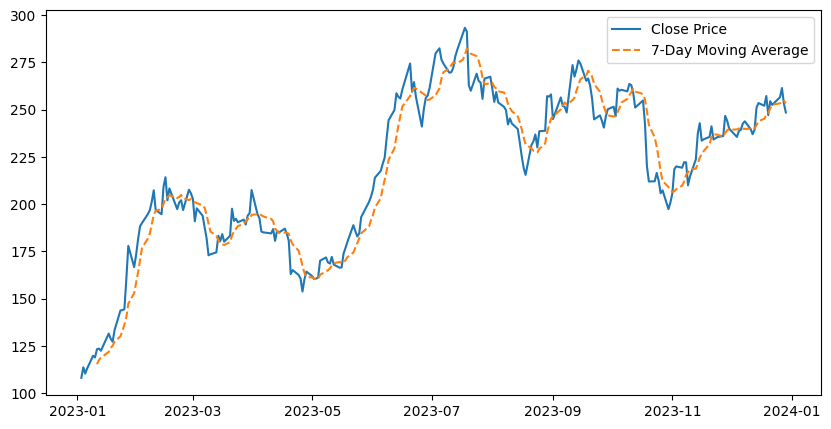

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch Tesla stock data
stock = yf.download('TSLA', start='2023-01-01', end='2023-12-31')

# Convert index to DateTime
stock.index = pd.to_datetime(stock.index)

# Calculate 7-day moving average
stock['7-day MA'] = stock['Close'].rolling(7).mean()

# Plot stock price
plt.figure(figsize=(10,5))
plt.plot(stock['Close'], label='Close Price')
plt.plot(stock['7-day MA'], label='7-Day Moving Average', linestyle='dashed')
plt.legend()
plt.show()


# 3. IMDb Movie Ratings Analysis

Skills: Filtering, Aggregation, Sorting

  Steps:    
  Load dataset    
  Find top-rated movies   
  Count movies per genre

In [3]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/movie.csv"
df = pd.read_csv(url)

# Drop missing values in IMDb score
df = df.dropna(subset=['imdb_score'])

# Find top 10 highest-rated movies
top_movies = df[['movie_title', 'imdb_score']].sort_values(by='imdb_score', ascending=False).head(10)
print(top_movies)

# Count movies per genre
genre_counts = df['genres'].value_counts()
print(genre_counts.head(10))


                   movie_title  imdb_score
2725          Towering Inferno         9.5
1920  The Shawshank Redemption         9.3
3402             The Godfather         9.2
4312      Kickboxer: Vengeance         9.1
2779                   Dekalog         9.1
2791    The Godfather: Part II         9.0
3415                     Fargo         9.0
66             The Dark Knight         9.0
3295              Pulp Fiction         8.9
4706              12 Angry Men         8.9
genres
Drama                          233
Comedy                         205
Comedy|Drama                   189
Comedy|Drama|Romance           185
Comedy|Romance                 157
Drama|Romance                  150
Crime|Drama|Thriller            98
Horror                          67
Action|Crime|Drama|Thriller     65
Drama|Thriller                  62
Name: count, dtype: int64


# 4. E-commerce Sales Analysis

Skills: Grouping, Merging, Pivot Tables

  Steps:    
  Load e-commerce sales data  
  Find total sales per product  
  Create a pivot table for sales per region

In [7]:
import pandas as pd

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)

# Show first few rows
print(df.head())

# Convert InvoiceDate to DateTime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Total sales per product
product_sales = df.groupby('Description')['Quantity'].sum().reset_index()
print(product_sales.sort_values(by="Quantity", ascending=False).head(10))

# Sales per country
country_sales = df.groupby('Country')['Quantity'].sum().reset_index()
print(country_sales.sort_values(by="Quantity", ascending=False).head(10))


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
                             Description  Quantity
4009   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
1866             JUMBO BAG RED RETROSPOT     47363
244        ASSORTED COLOUR BIRD ORNA

# 5. COVID-19 Data Analysis

Skills: Time-Series Analysis, Missing Data, Visualization

Steps:  
Load COVID-19 dataset   
Filter data for a specific country  
Plot daily new cases over time

<ipython-input-9-f145ead52d61>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data.fillna(0, inplace=True)


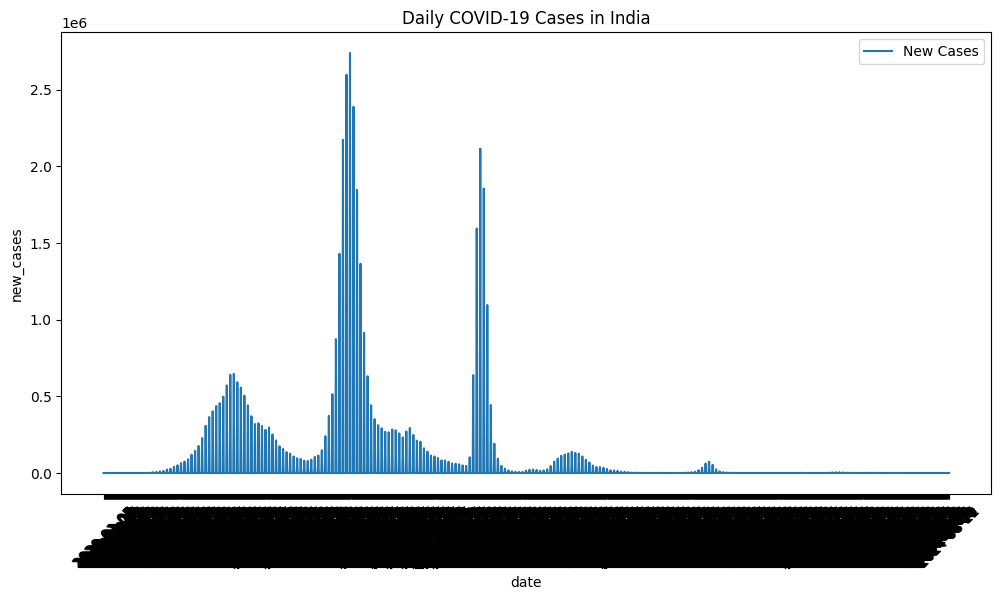

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Select data for India
india_data = df[df['location'] == 'India']

# Fill missing values
india_data.fillna(0, inplace=True)

# Plot new cases over time
plt.figure(figsize=(12,6))
sns.lineplot(x=india_data['date'], y=india_data['new_cases'], label="New Cases")
plt.xticks(rotation=45)
plt.title("Daily COVID-19 Cases in India")
plt.show()
